Specify which task to evaluate (possible tasks are "A" or "B"), or "EXIT" to terminate: b
Specify which algorithm to use (possible algorithms are "nb" (Naive Bayes), "dt" (Decision Trees) or "nn" (Neural Networks)), or "EXIT" to terminate: dt

Loading...

------------ TASK B -------------
-------- DECISION TREES --------


Ironic with polarity contrast = 0 | Ironic without polarity contrast = 1 | Situationaly ironic = 2 | Non-ironic = 3


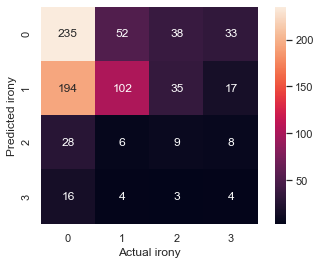

The accuracy is 0.44643%
The precision is 0.48819%
The recall is 0.44643%
The f1 is 0.44603%


Time taken to train model: 10.49643 seconds
Time taken to train model: 0.85202 seconds


In [1]:
import sys
import re
import time
import emoji
import tweet_cleaning as tc
import naive_bayes as nb
import decisionTree as dt
import neuralNetwork as nn

def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += (" " + ele)
    return str1 

def readData(filename):
    tweets = []
    with open(filename, encoding="utf8") as f:
        for line in f:
            tweets.append([line.split("	")[0], line.split("	")[1], line.split("	")[2]])
    return tweets

def getInfoFromTweets(data):
    ids = []
    scores = []
    tweets = []
    for line in data:
        ids.append(line[0])
        scores.append(line[1])
        tweets.append(line[2])
    return ids, scores, tweets

def stripEmojisFromTweets(tweets):
    emojis = []
    new_tweets = []
    for tweet in tweets:
        emojis.append(getEmojisFromTweet(tweet))
        new_tweets.append(re.sub("(:)\w*(:)", "", tweet))
    return emojis, new_tweets

def getEmojisFromTweet(tweet):
    emoji = []
    for i in tweet.split():
        if i.startswith(":"):
            emoji.extend(list(filter(None, i.split(":"))))
    emoji = list(set(emoji))
    emoji = [i for i in emoji if i[0].isalpha()]
    return emoji

def stripHashtagsFromTweets(tweets):
    hashtags = []
    new_tweets = []
    for tweet in tweets:
        hashtagsOfTweet = re.findall("#\w+", tweet)
        hashtags.append(hashtagsOfTweet)
        new_tweets.append(" ".join(filter(lambda x: x[0] != '#', tweet.split())))
    return hashtags, new_tweets

def cleanTweets(tweets):
    new_tweets = []
    for tweet in tweets:
        new_tweets.append(tc.clean_tweet(tweet))
    return new_tweets

def chooseTask():
    option = input("Specify which task to evaluate (possible tasks are \"A\" or \"B\"), or \"EXIT\" to terminate: ")
    if option.upper() == "A":
        testFileName = "../Test Data/test_taskA.txt"
        trainFileName = "../Train Data/train_taskA.txt"
        chooseAlgorithm(testFileName, trainFileName, "A")
    elif option.upper() == "B":
        testFileName = "../Test Data/test_taskB.txt"
        trainFileName = "../Train Data/train_taskB.txt"
        chooseAlgorithm(testFileName, trainFileName, "B")
    elif option.upper() == "EXIT":
        print('Terminating..')
        sys.exit()
    else:
        print('Wrong input, try again!')
        chooseTask()
        
def chooseAlgorithm(testFileName, trainFileName, task):
    option = input("Specify which algorithm to use (possible algorithms are \"nb\" (Naive Bayes), \"dt\" (Decision Trees) or \"nn\" (Neural Networks)), or \"EXIT\" to terminate: ")
    if option.upper() == "NB":
        print("\nLoading...\n")
        start = time.time()
        trainData, trainScores, testData, testScores = getData(testFileName, trainFileName)
        end = time.time()
        trainDataProcessTime = end - start
        nb.proccess(trainData, trainScores, testData, testScores, task, trainDataProcessTime)
    elif option.upper() == "DT":
        print("\nLoading...\n")
        start = time.time()
        trainData, trainScores, testData, testScores = getData(testFileName, trainFileName)
        end = time.time()
        trainDataProcessTime = end - start
        dt.proccess(trainData, trainScores, testData, testScores, task, trainDataProcessTime)
    elif option.upper() == "NN":
        print("\nLoading...\n")
        start = time.time()
        trainData, trainScores, testData, testScores = getData(testFileName, trainFileName)
        end = time.time()
        trainDataProcessTime = end - start
        nn.proccess(trainData, trainScores, testData, testScores, task, trainDataProcessTime)
    elif option.upper() == "EXIT":
        print('Terminating..')
        sys.exit()
    else:
        print('Wrong input, try again!')
        chooseAlgorithm(testFileName, trainFileName, task)

def getData(testFileName, trainFileName):
    trainRawData = readData(trainFileName)

    trainIds, trainScores, trainTweets = getInfoFromTweets(trainRawData)

    trainEmojis, trainTweets = stripEmojisFromTweets(trainTweets)

    trainHashtags, trainTweets  = stripHashtagsFromTweets(trainTweets)

    trainTweets = cleanTweets(trainTweets)

    trainData = []

    testRawData = readData(testFileName)

    testIds, testScores, testTweets = getInfoFromTweets(testRawData)

    for tweet in testTweets:
        emoji.demojize(tweet, delimiters=(":", ":"))

    testEmojis, testTweets = stripEmojisFromTweets(testTweets)

    testHashtags, testTweets  = stripHashtagsFromTweets(testTweets)

    testTweets = cleanTweets(testTweets)

    testData = []

    count = 0
    for tweet in trainTweets:
        trainData.append(trainTweets[count] + listToString(trainEmojis[count]) + listToString(trainHashtags[count]))
        count += 1

    count = 0
    for tweet in testTweets:
        testData.append(testTweets[count] + listToString(testEmojis[count]) + listToString(testHashtags[count]))
        count += 1
        
    return trainData, trainScores, testData, testScores

chooseTask()